# How Can We Improve Customer Loyalty?


## Improving products and services offered to customers tailored to them based on their spending habits

## Benefits:
* Improve customer retention
* Improve advertising efficiency
* Increase Revenue

In [112]:
#load the libraries into python
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
import umap
import warnings
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
warnings.filterwarnings('ignore')

In [67]:
#load data set into python
df = pd.read_csv('CC General.csv')

## Heading of Data Set

In [68]:
#heading of data set
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Description of Features

* CUST_ID : Identification of credit card holder
* BALANCE : Balance amount left in their account to make purchases
* BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : purchase amount made from account
* ONEOFF_PURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES : Amount of purchase done in installment
* CASH_ADVANCE : Cash in advance taken by the user
* PURCHASES_FREQUENCY : How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY : How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)


* PURCHASE_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
* CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid 
* CASH_ADVANCE_TRX : Number of transactions made with cash in advance
* PURCHASES_TRX : Number of purchase transactions made
* CREDIT_LIMIT : Limit of credit for user
* PAYMENTS : Amount of payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRC_FULL_PAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

## Feature Data

In [69]:
#show data type of each feature
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [70]:
#give info of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [71]:
#show how many unique values in each feature
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [72]:
#show percentage of null values in each feature
df.isnull().sum()*100/df.isnull().count()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [73]:
#deal with missing values by inserting the mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [9]:
#give descriptive statistics of each feature
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Distribution of Features

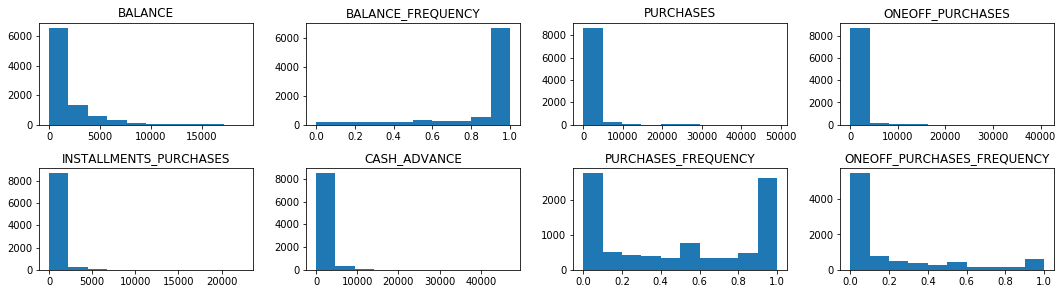

In [37]:
#show histogram of each feature
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[1:9]:
    plt.subplot(5,4,i)
    plt.hist(df[col])
    plt.title(df.columns[i])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

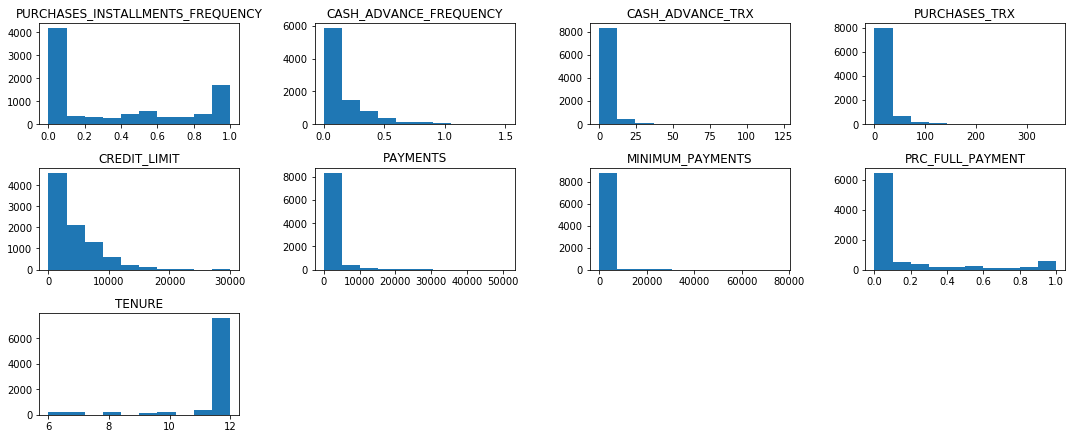

In [46]:
#show histogram of each feature
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[9:]:
    plt.subplot(5,4,i)
    plt.hist(df[col])
    plt.title(df.columns[i+8])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

## Boxplots of Features

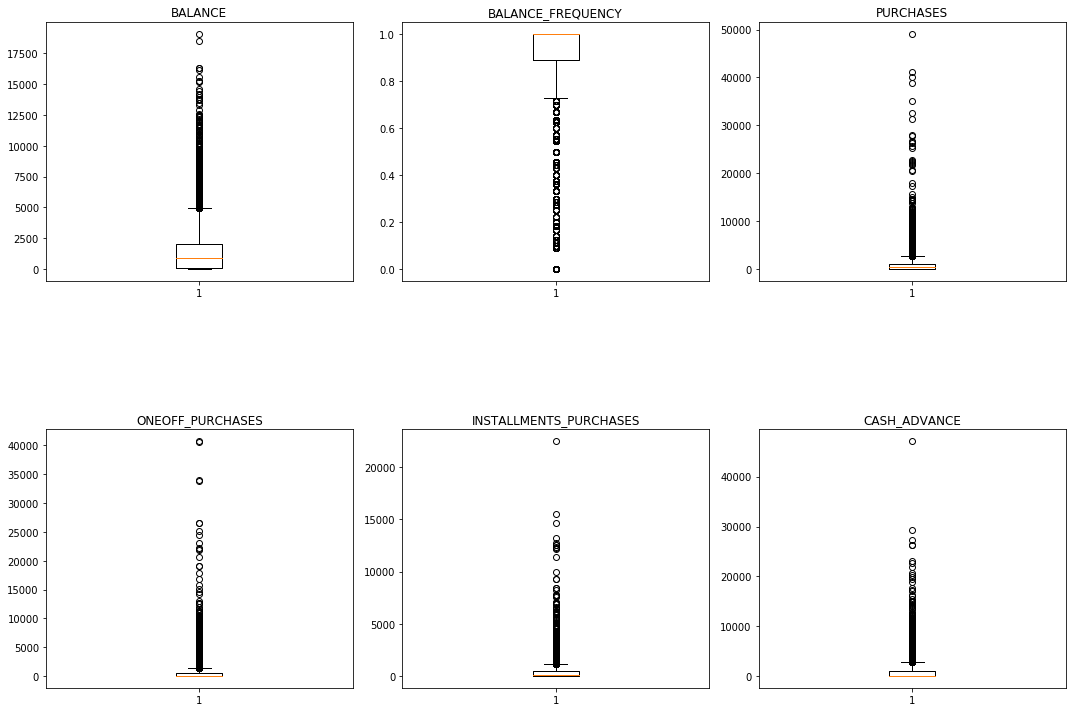

In [54]:
#show boxplot of features
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[1:7]:
    plt.subplot(2,3,i)
    plt.boxplot(df[col])
    plt.title(df.columns[i])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

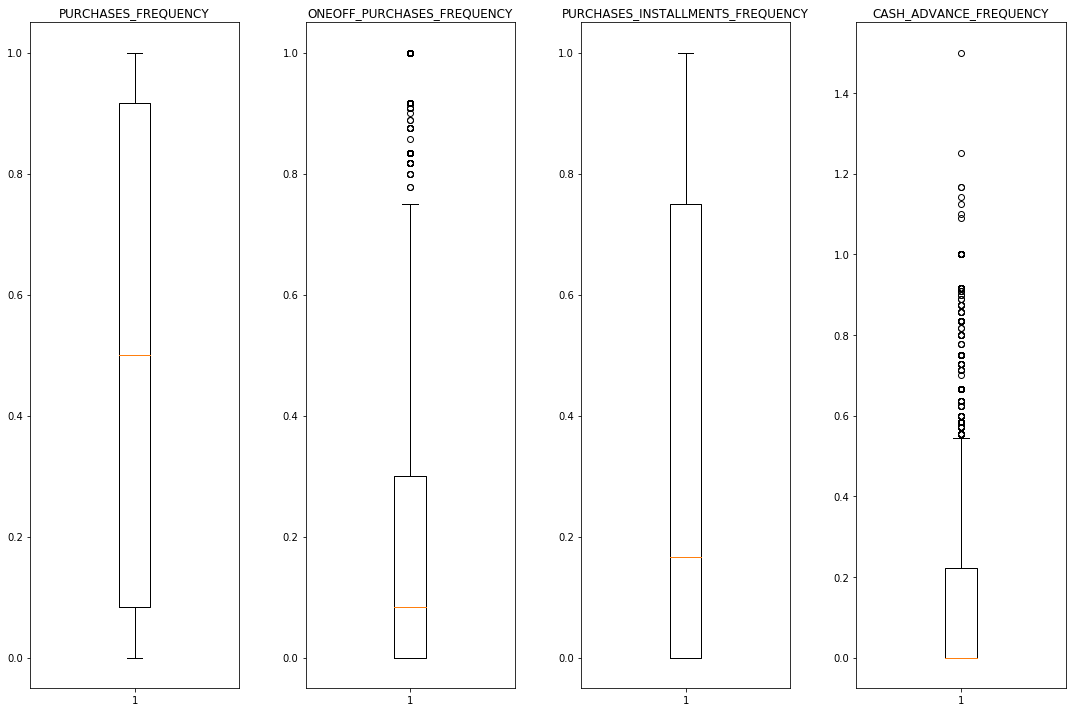

In [55]:
#show boxplot of features
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[7:11]:
    plt.subplot(1,4,i)
    plt.boxplot(df[col])
    plt.title(df.columns[i+6])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

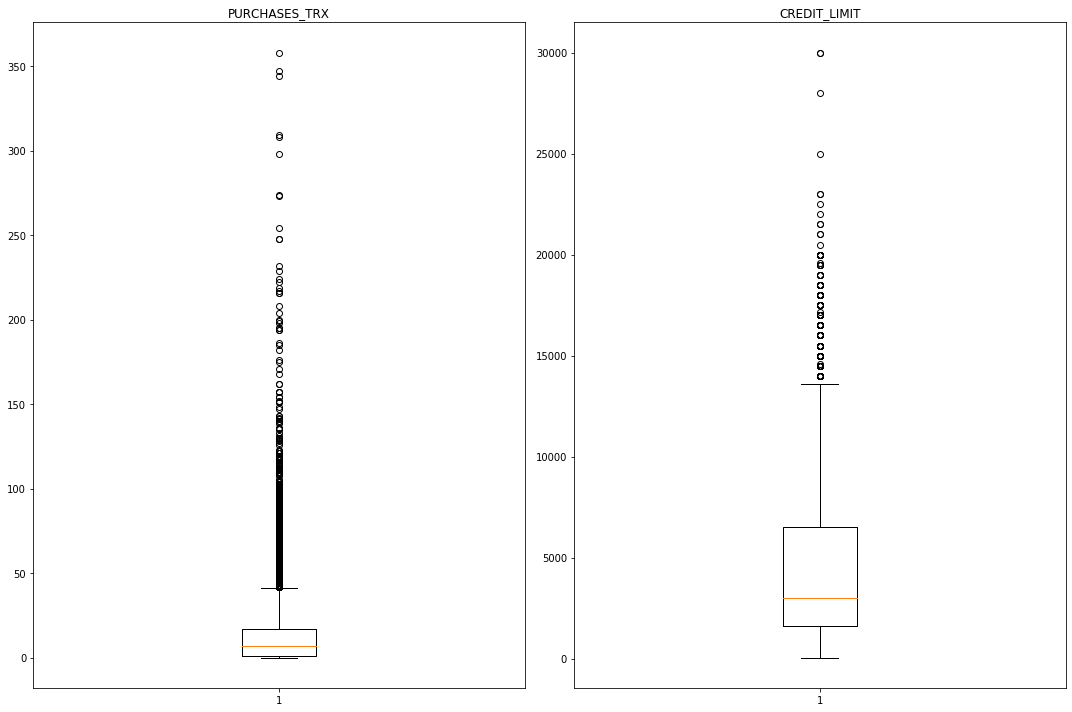

In [82]:
#show boxplot of features
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[11:13]:
    plt.subplot(1,2,i)
    plt.boxplot(df[col])
    plt.title(df.columns[i+10])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

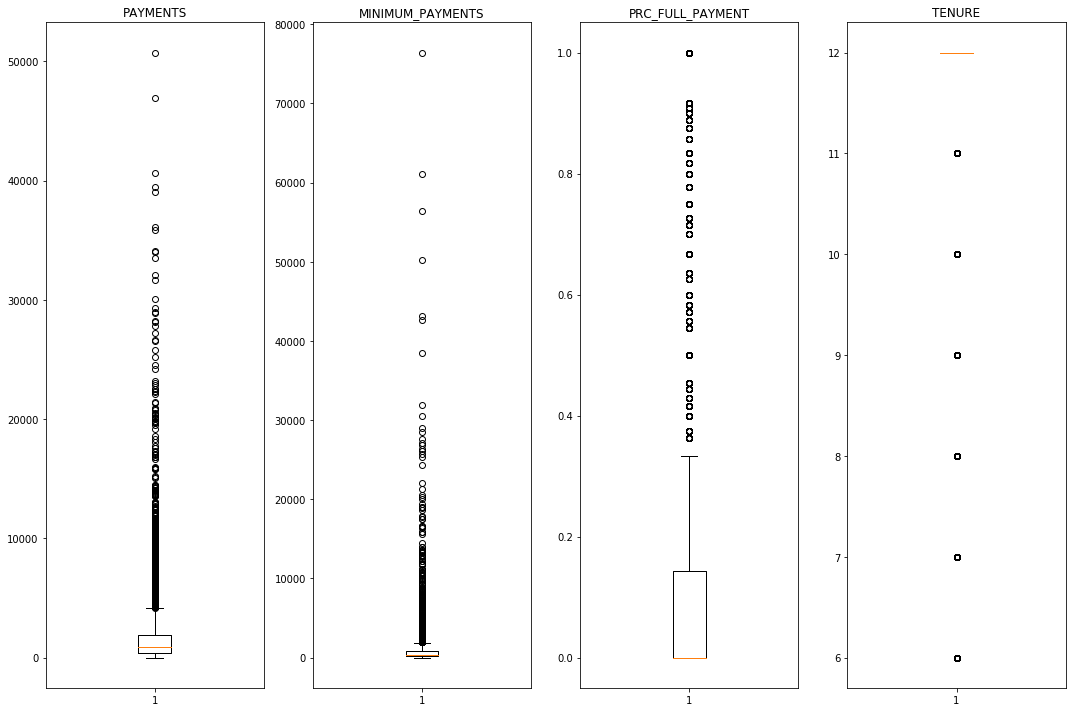

In [98]:
#show boxplot of features
i = 1
plt.figure(figsize=(15,10))
for col in df.columns[13:17]:
    plt.subplot(1,4,i)
    plt.boxplot(df[col])
    plt.title(df.columns[i+12])
    i = i+1
    
plt.subplots_adjust(bottom=-1)
plt.tight_layout()
plt.show()

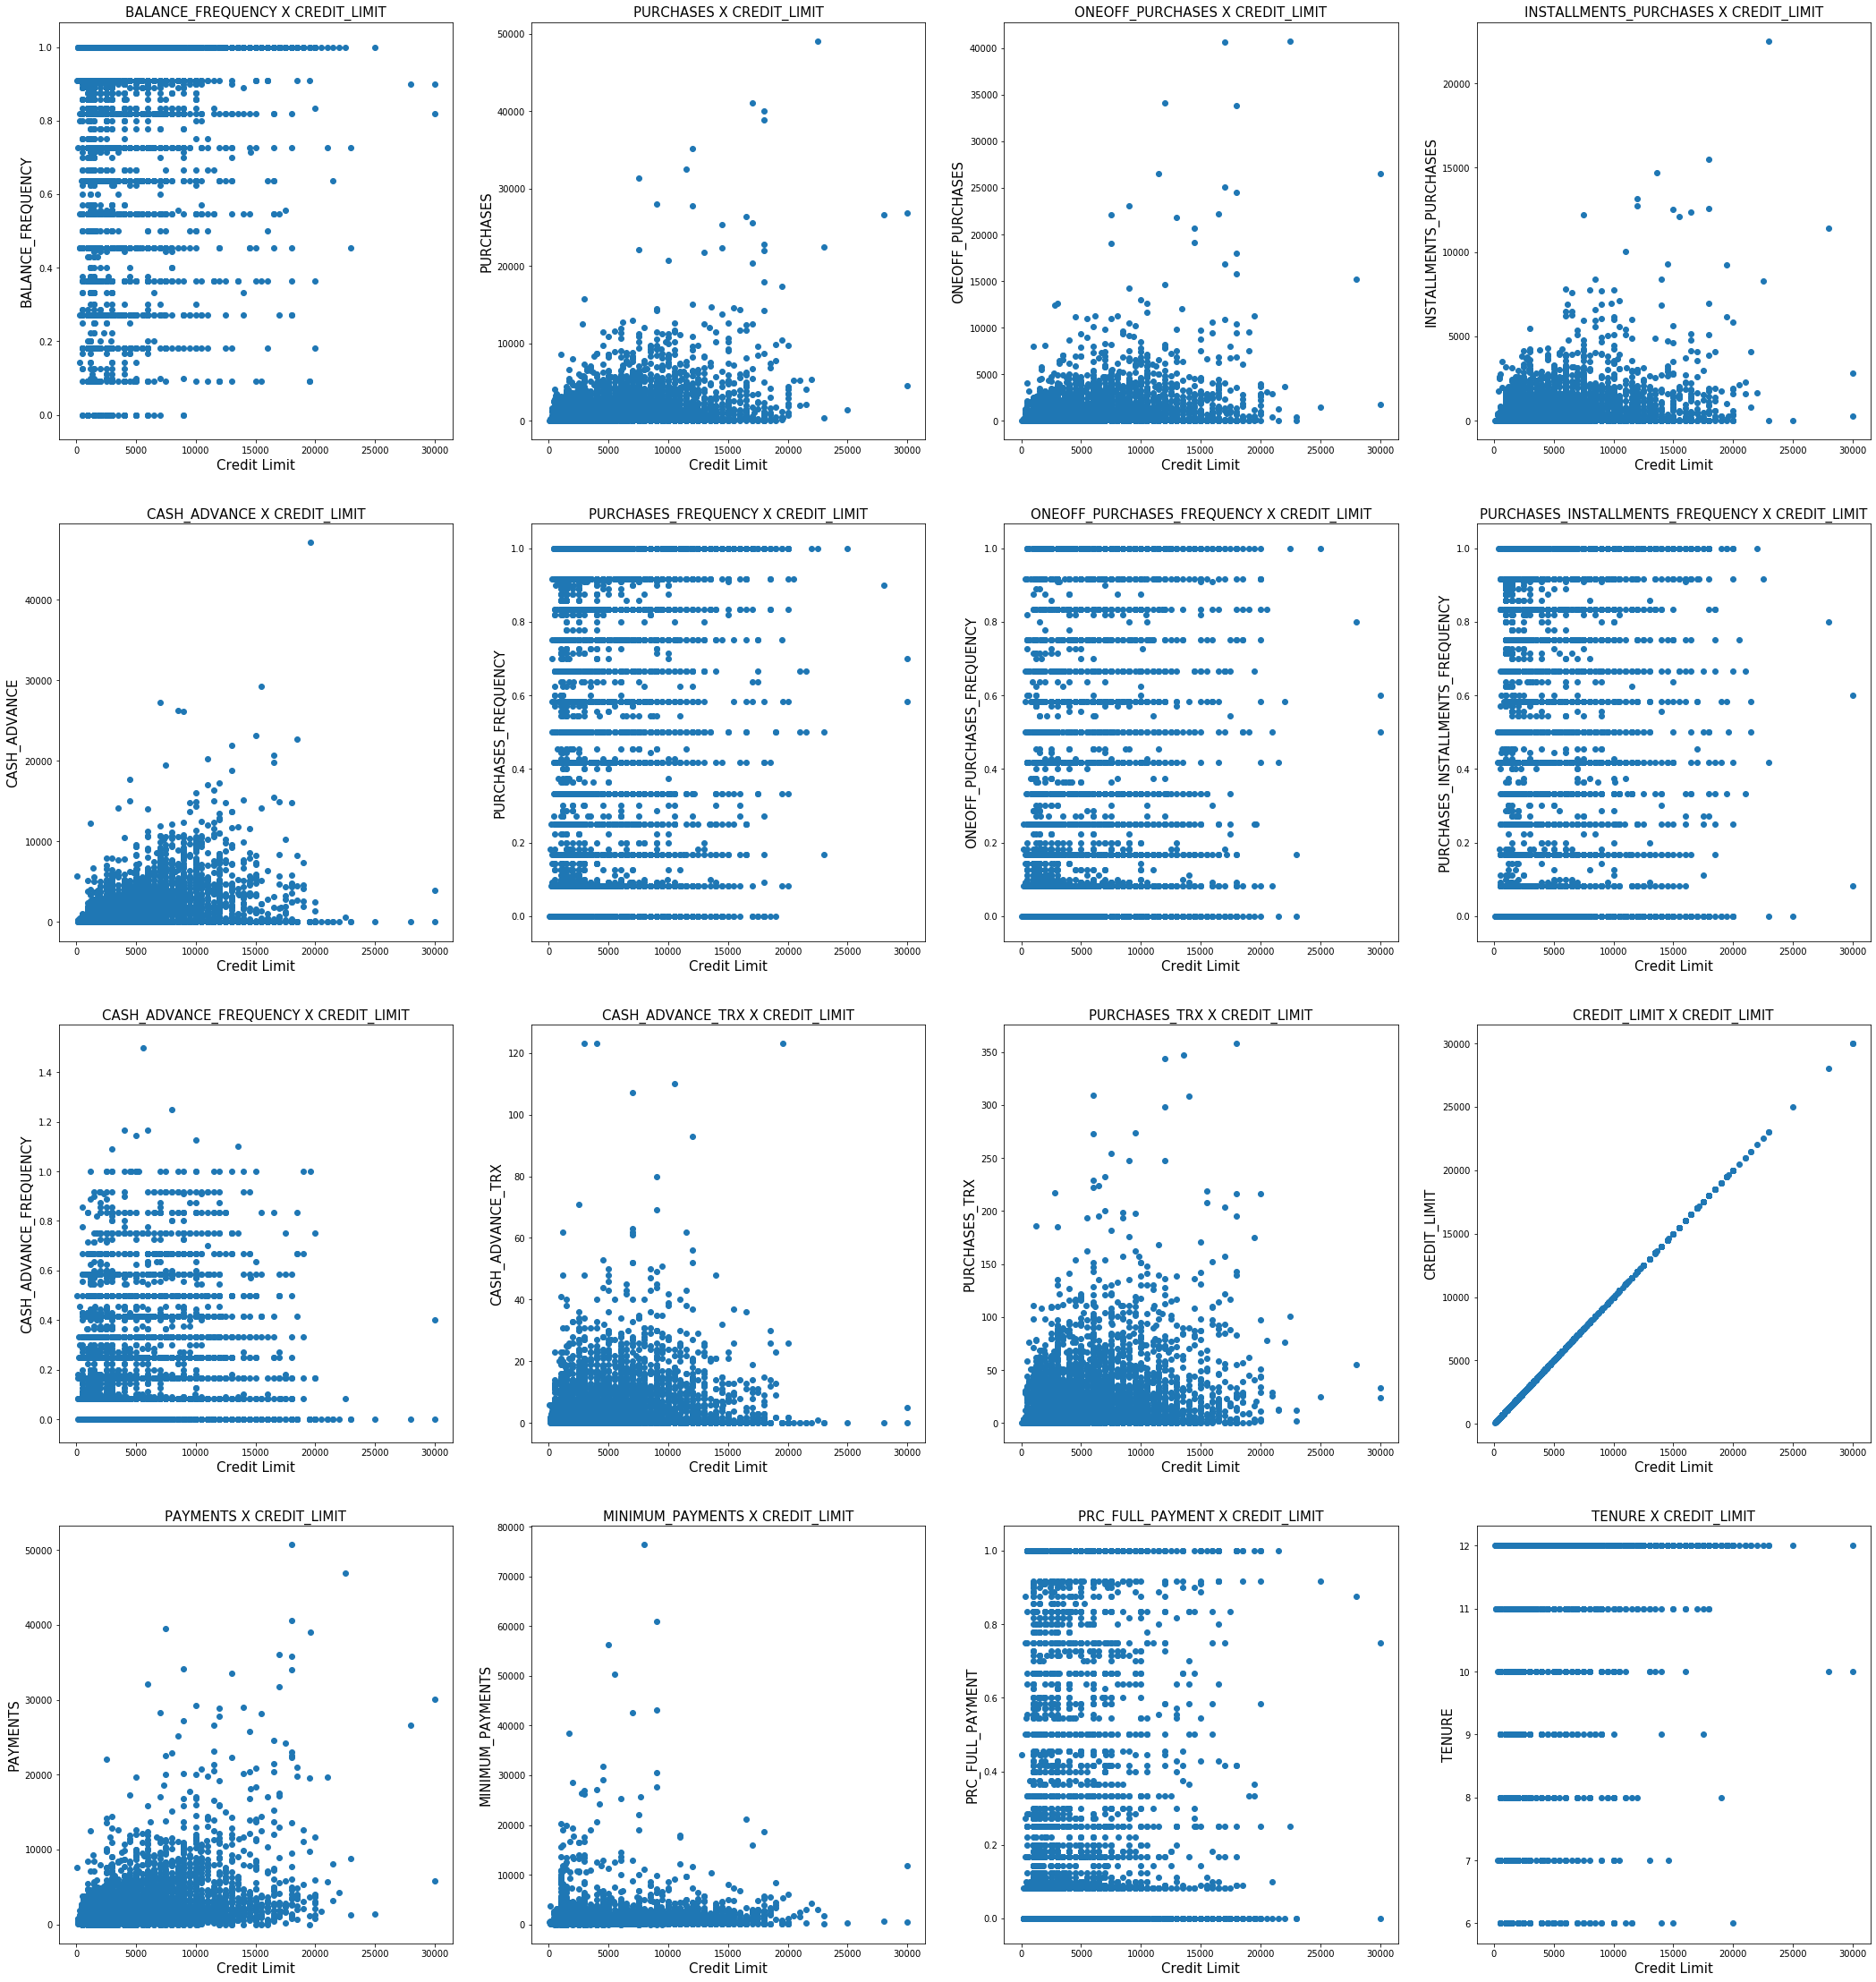

In [26]:
#show scatter plot of each feature and credit limit
i = 1
plt.figure(figsize=(15,20))
for col in df.columns[1:]:
    plt.subplot(5,4,i)
    plt.scatter(df['CREDIT_LIMIT'], df[col])
    plt.title(col + ' X CREDIT_LIMIT',fontsize= 15)
    plt.xlabel('Credit Limit', fontsize = 15)
    plt.ylabel(col, fontsize=15)
    i = i+1
    
plt.subplots_adjust(bottom=-1, right=2)
plt.show()

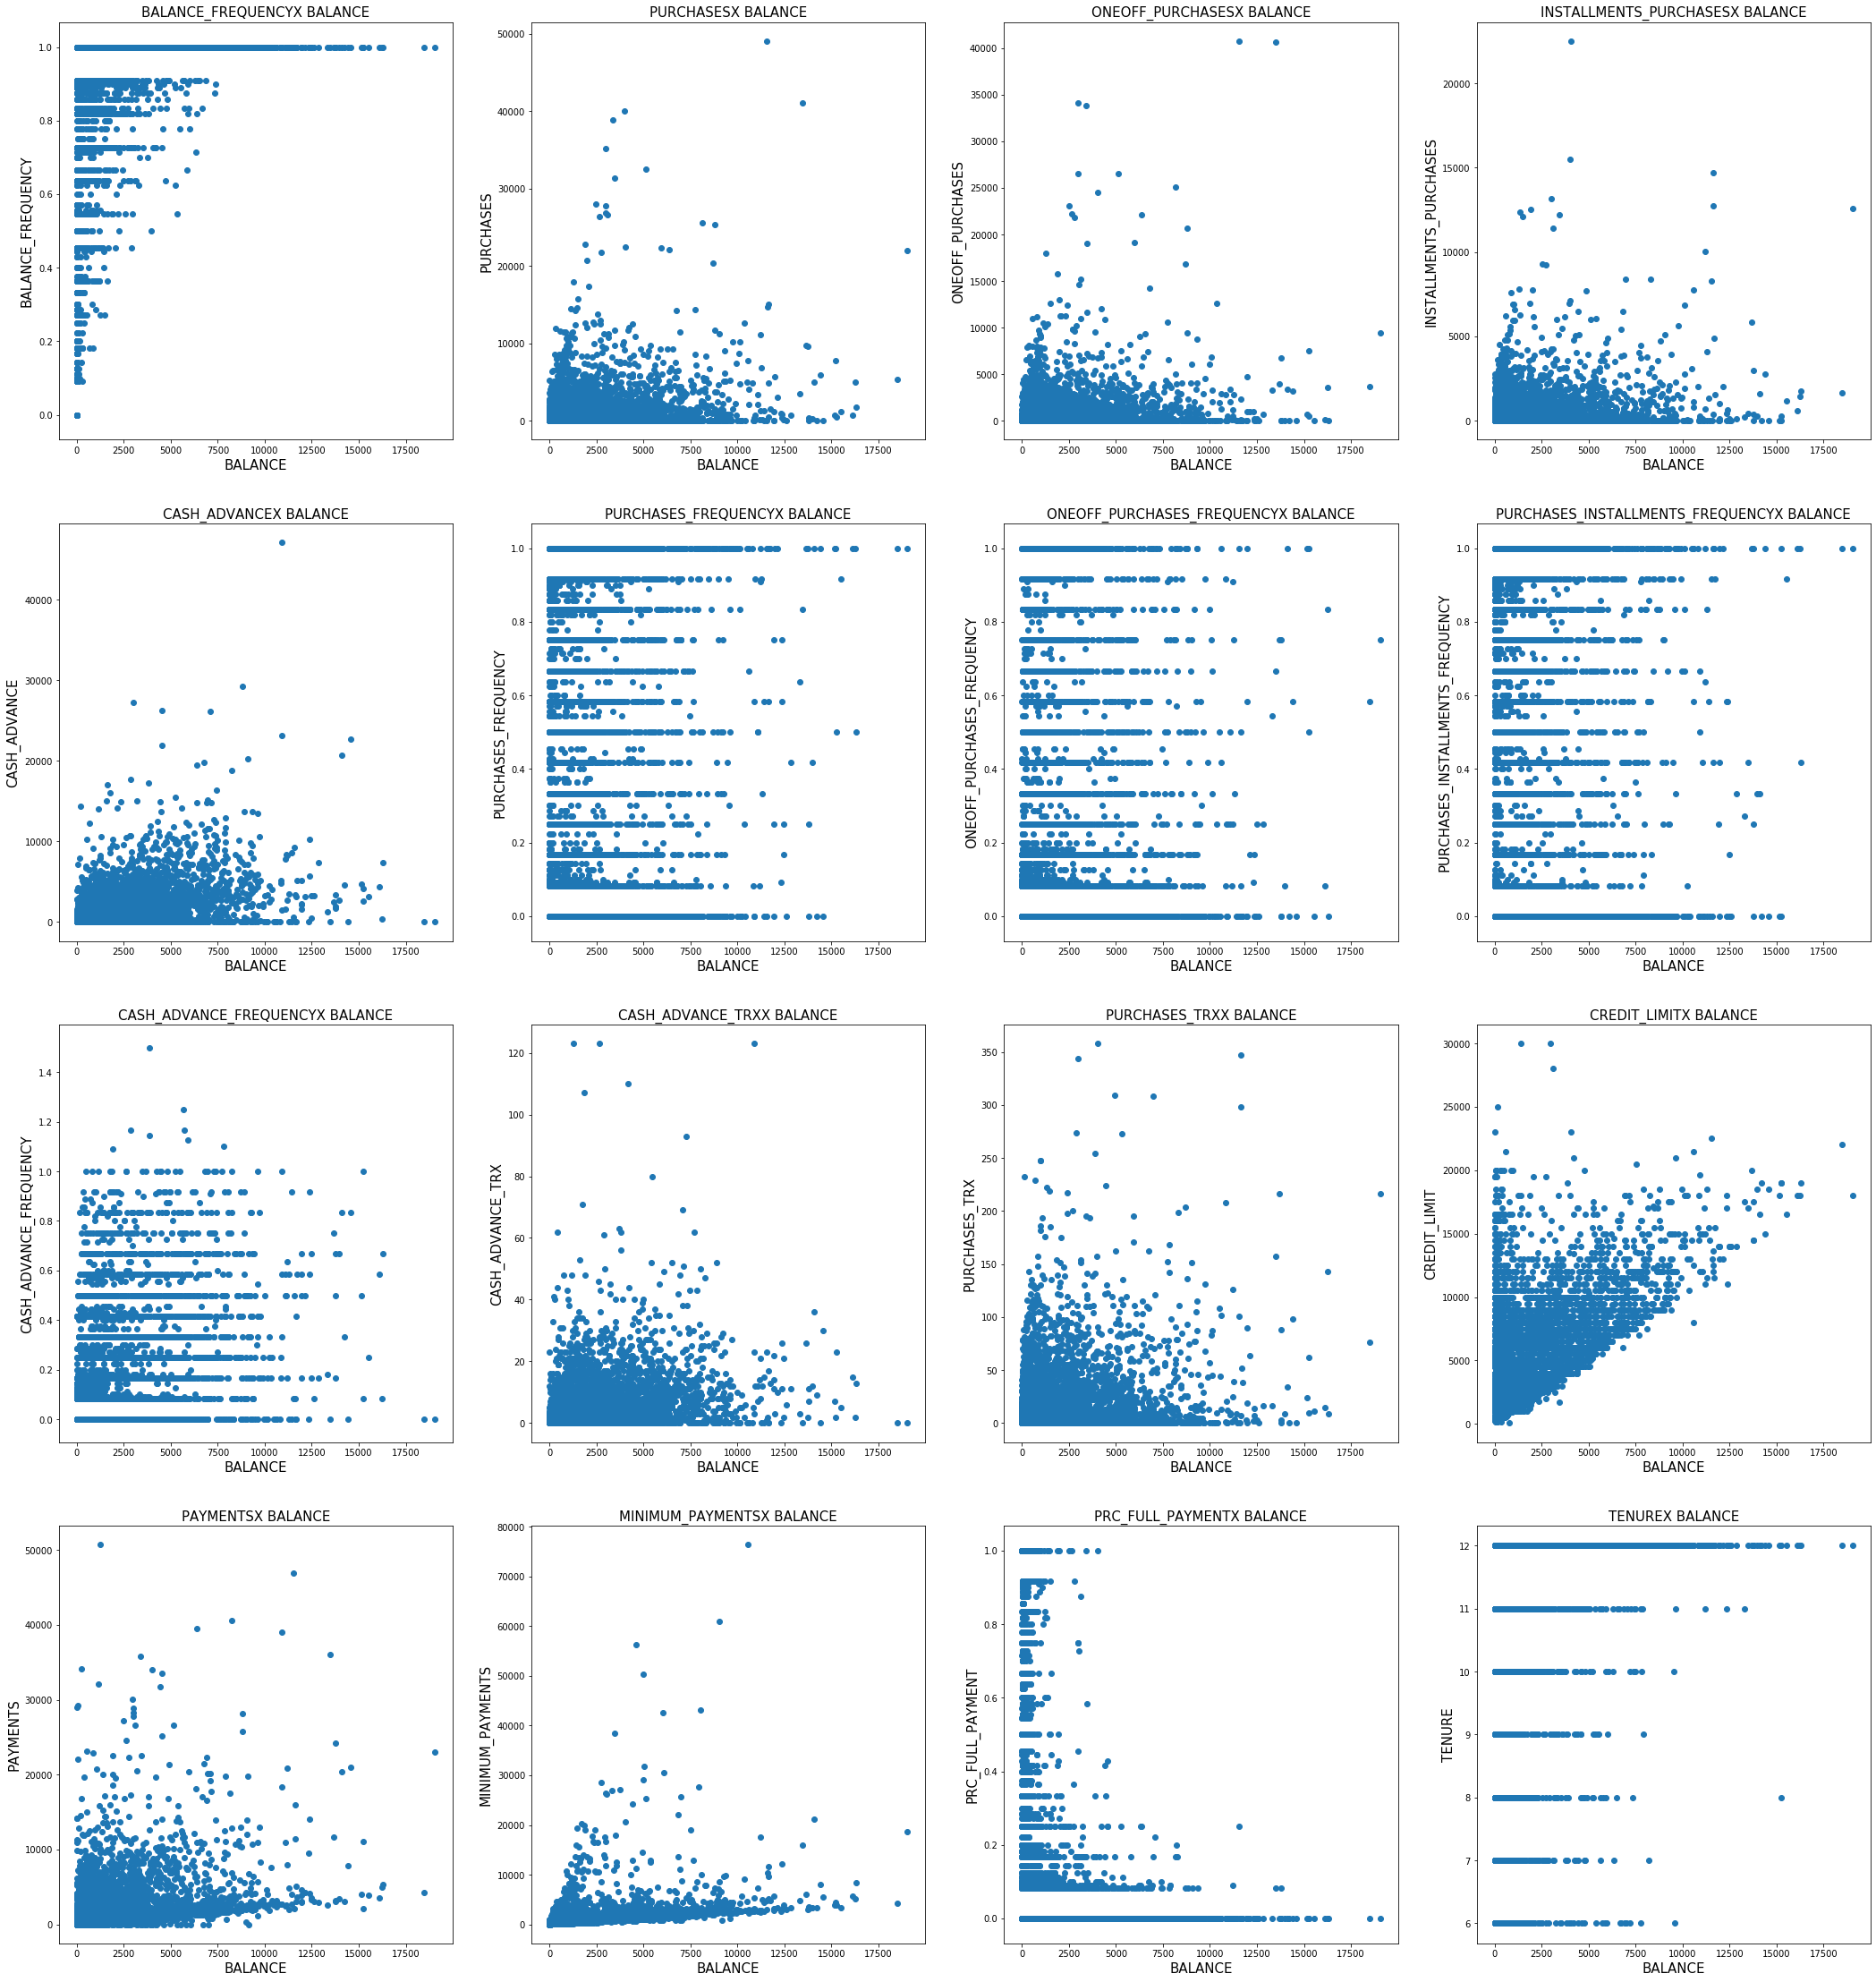

In [107]:
#show scatter plot of each feature and balance
i = 1
plt.figure(figsize=(15,20))
for col in df.columns[1:]:
    plt.subplot(5,4,i)
    plt.scatter(df['BALANCE'], df[col])
    plt.title(col + 'X BALANCE', fontsize=15)
    plt.xlabel('BALANCE', fontsize=15)
    plt.ylabel(col, fontsize=15)
    i = i+1
    
plt.subplots_adjust(bottom=-1, right=2)
plt.show()

In [74]:
#prepare the dataset to be put into model
df = df.drop('CUST_ID', axis=1)
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

# Converting the numpy array into a pandas DataFrame 
x = pd.DataFrame(scaled_df) 

## Kmeans Clustering

Text(0.5, 0, 'Number of Clusters')

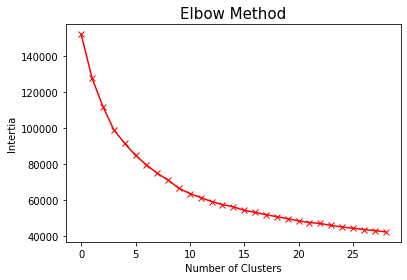

In [110]:
#Elbow Method
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(x)
    cost.append(kmean.inertia_)
plt.plot(cost, 'rx-')
plt.title('Elbow Method', fontsize = 15)
plt.ylabel('Intertia', fontsize=10)
plt.xlabel('Number of Clusters', fontsize=10)

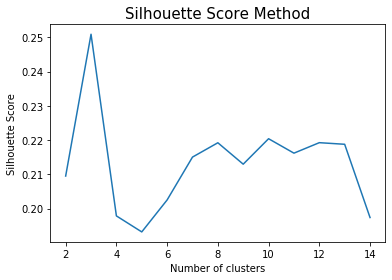

In [111]:
#silhhouette score method
silhouette_scores = []
for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(x, KMeans(n_clusters = n_cluster).fit_predict(x)))
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.plot(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('Silhouette Score Method', fontsize=15)
plt.show() 

In [13]:
#initialize kmeans model
kmean= KMeans(4)
kmean.fit(x)
kmean_labels=kmean.labels_

## Dataset with Clusters Assigned

In [14]:
#create original data set that also shows which cluster they belong to
clusters=pd.concat([df, pd.DataFrame({'cluster':kmean_labels})], axis=1)
clusters.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [15]:
#perform PCA on dataset to graph
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
df_pca.head(2)

,principal component 1,principal component 2
0,-1.682220,-1.076445
1,-1.138298,2.506485


In [16]:
#append PCA with the cluster they belong to
df_pca_kmean = pd.concat([df_pca, pd.DataFrame({'cluster':kmean_labels})], axis = 1)
df_pca_kmean.head()

,principal component 1,principal component 2,cluster
0,-1.682220,-1.076445,3
1,-1.138298,2.506485,2
2,0.969682,-0.383533,1
3,-0.873629,0.043174,3
4,-1.599433,-0.688577,3


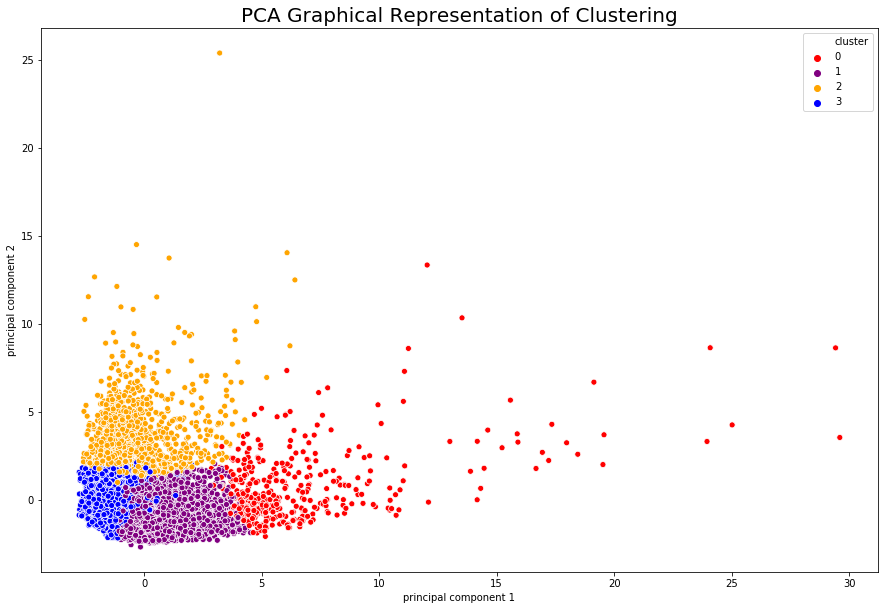

In [18]:
#graph PCA clustering
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=df_pca_kmean,palette=['red','purple','orange','blue'])
plt.title('PCA Graphical Representation of Clustering', fontsize = 20)
plt.show()

In [20]:
#perform tsne on dataset
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df_tsne = tsne.fit_transform(x)
tsne_result =  pd.DataFrame(df_tsne, columns=['TSNE%i' % i for i in range(2)])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.013s...
[t-SNE] Computed neighbors for 8950 samples in 2.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.469261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.701920
[t-SNE] KL divergence after 300 iterations: 2.515211


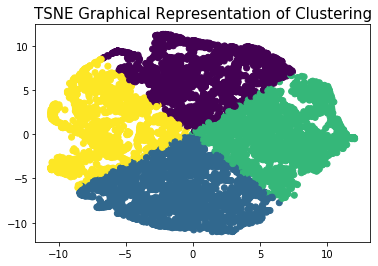

In [21]:
#graph tsne clustering
plt.scatter(tsne_result['TSNE0'], tsne_result['TSNE1'],
            c  = KMeans(n_clusters=4).fit_predict(df_tsne), cmap =None) 
plt.title('TSNE Graphical Representation of Clustering', fontsize=15)
plt.show()

Text(0.5, 1.0, 'UMAP Graphical Representation of Clustering')

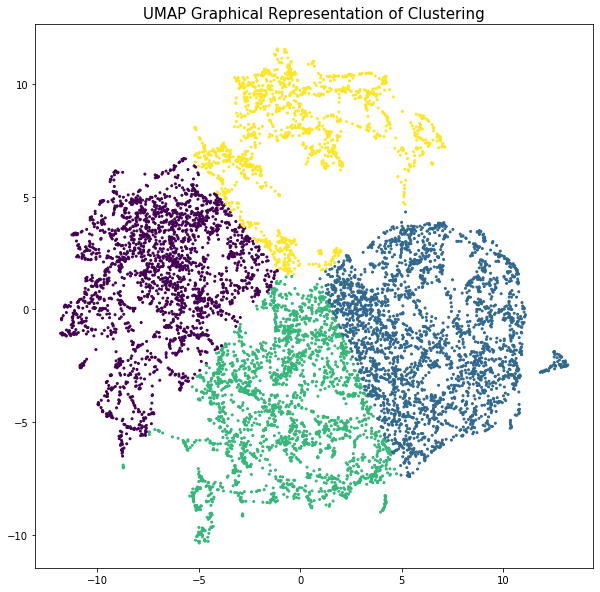

In [49]:
#perform umap on dataset and graph the umap clustering
df_umap= umap.UMAP(n_neighbors=4, min_dist=0.3, metric='correlation')
umap_results=df_umap.fit_transform(x)

plt.figure(figsize=(10,10))
plt.scatter(umap_results[:, 0], umap_results[:, 1],
            c = KMeans(n_clusters=4).fit_predict(umap_results), s=4)
plt.title('UMAP Graphical Representation of Clustering',fontsize= 15)

## Distribution of Features by Clusters

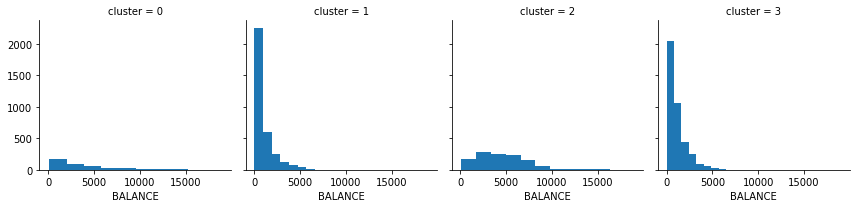

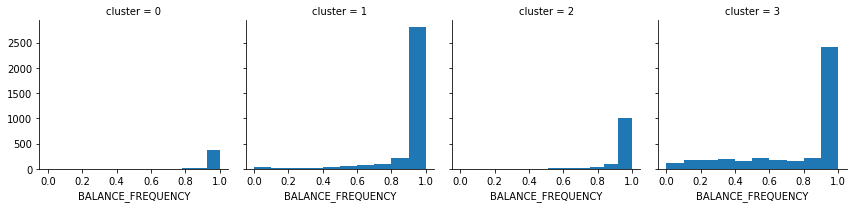

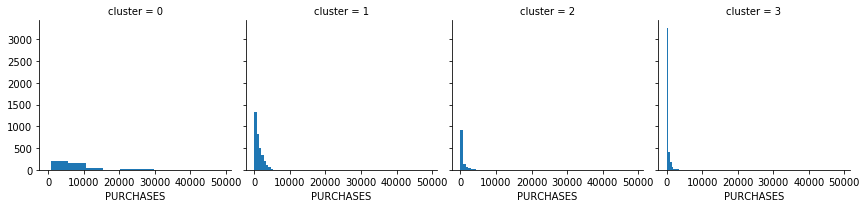

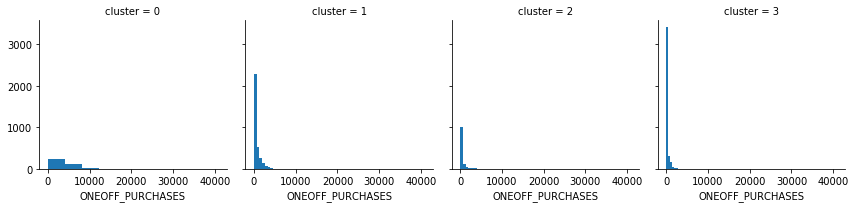

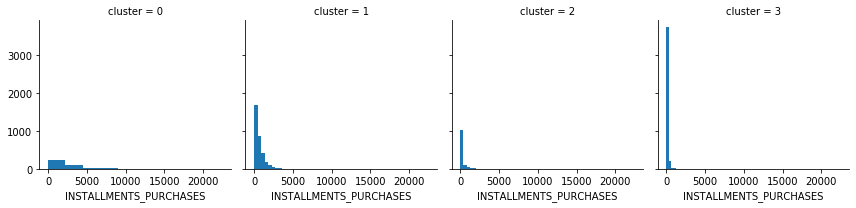

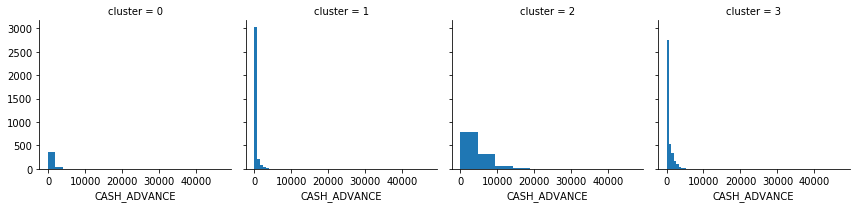

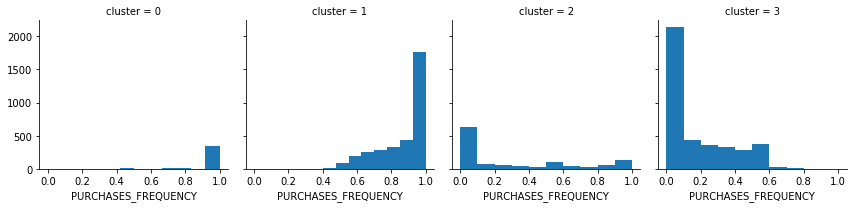

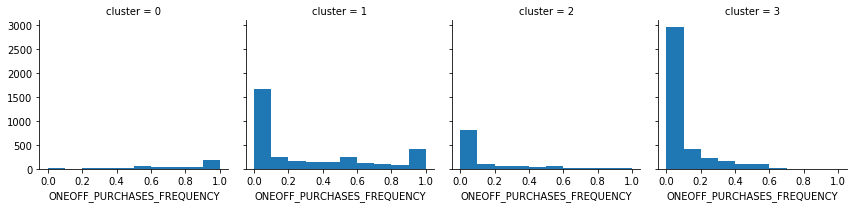

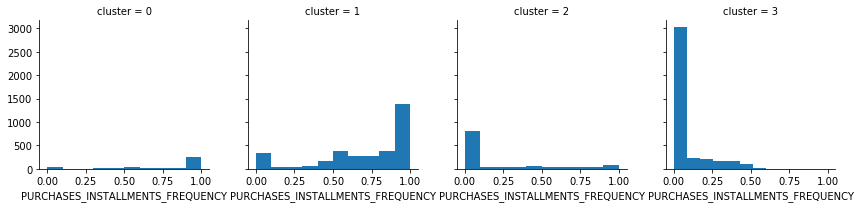

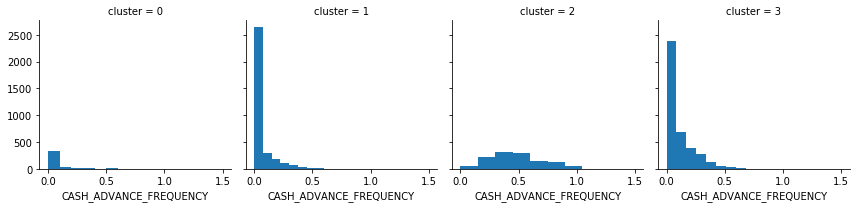

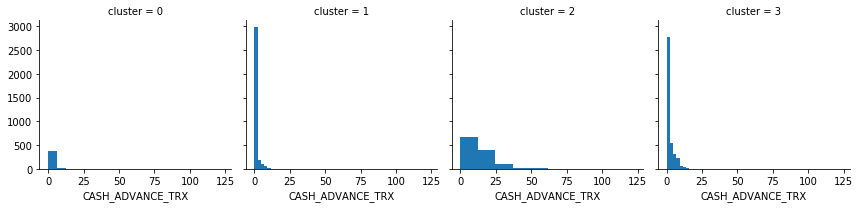

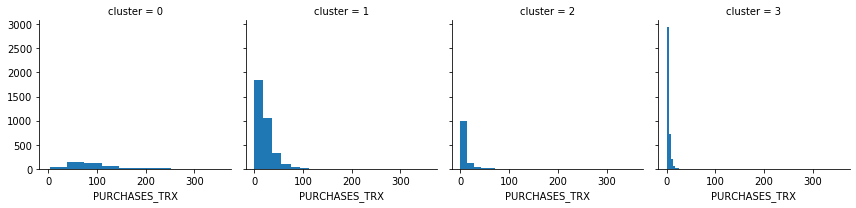

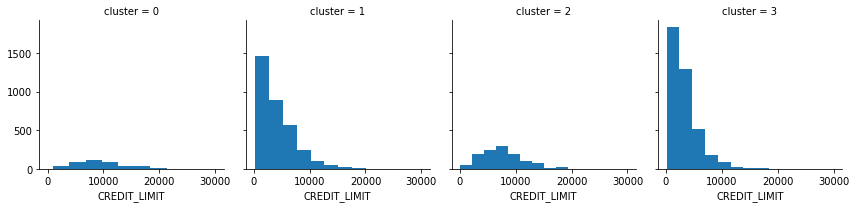

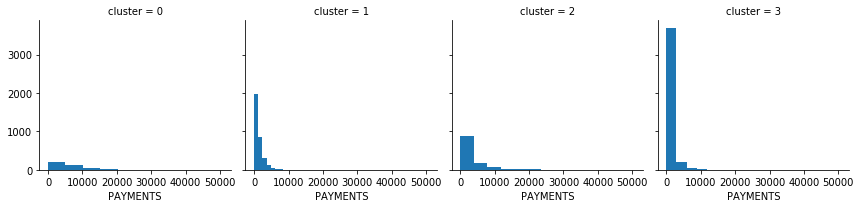

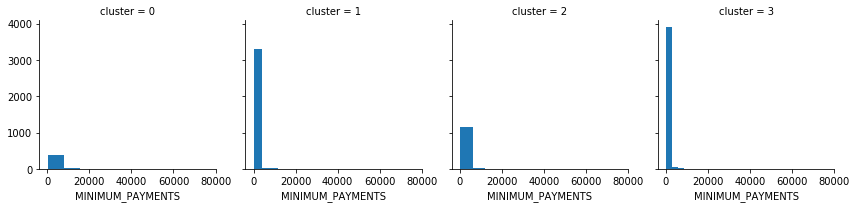

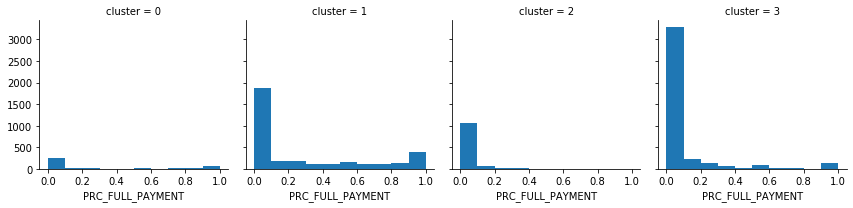

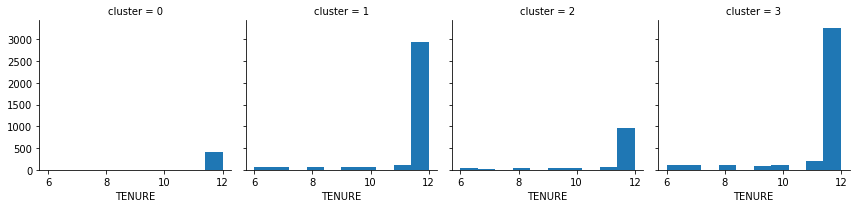

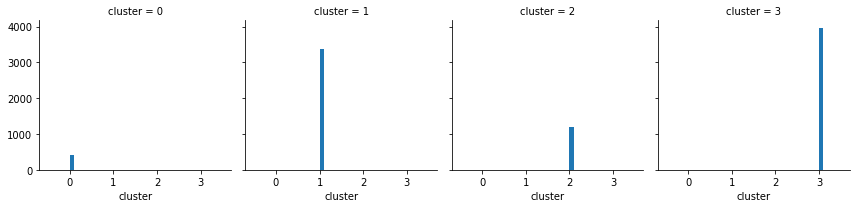

In [23]:
#show histogram of features by cluster
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

## Means of Each Feature by Cluster

In [96]:
#show the mean of each feature for each cluster
round(clusters.groupby('cluster').mean(),2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3551.15,0.99,7681.62,5095.88,2587.21,653.64,0.95,0.74,0.79,0.07,2.09,89.36,9696.94,7288.74,1976.82,0.29,11.95
1,894.91,0.93,1236.18,593.97,642.48,210.57,0.89,0.30,0.71,0.04,0.79,22.09,4213.21,1332.19,650.17,0.27,11.59
2,4602.46,0.97,501.90,320.37,181.61,4520.72,0.29,0.14,0.19,0.48,14.28,7.66,7546.96,3481.15,2008.25,0.03,11.39
3,1011.75,0.79,269.97,209.85,60.39,595.76,0.17,0.09,0.08,0.11,2.13,2.90,3277.70,974.51,586.30,0.08,11.45


<style>
td {
  font-size: 30px
}
</style>

| Cluster | Balance | Credit Limit | Cash Advance | Purchase Amount | Installment Purchases Frequency | One-off Purchases Frequency |
|---------|---------|--------------|--------------|-----------------|---------------------------------|-----------------------------|
| 0       | High    | High         | Low          | High            | High                            | High                        |
| 1       | Low     | Medium       | Low          | Medium          | High                            | Medium                      |
| 2       | High    | High         | High         | Low             | Low                             | Low                         |
| 3       | Low     | Low        | Low          | Low             | Low                             | Low                         |

Cluster 0: Big Spenders. Have high credit limits and high balance. Frequently purchase things in one-off or installments.

Cluster 1: Sensible Spender. Have a low balance and medium credit limit. Mostly buys things in installments.

Cluster 2: Short on Cash. Have a high balance and high credit limit. Does not make many purchases but takes cash advances often.

Cluster 3: Thrifty Spenders. small balance, small credit limit, rarely buy things, and infrequently update balance/pay in full.

## Agglomerative Clustering

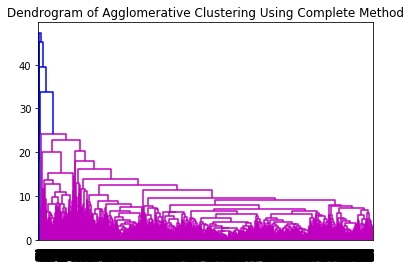

<Figure size 3600x3600 with 0 Axes>

In [93]:
#create the dendrogram for agglomerative clustering with complete method
plt.title('Dendrogram of Agglomerative Clustering Using Complete Method')
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))
plt.figure(figsize=(50,50)) 
plt.show()

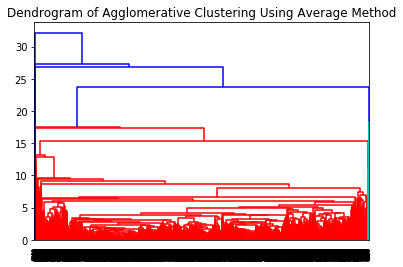

<Figure size 3600x3600 with 0 Axes>

In [94]:
#create the dendrogram for agglomerative clustering with average method
dendrogram = sch.dendrogram(sch.linkage(x, method='average'))
plt.title('Dendrogram of Agglomerative Clustering Using Average Method')
plt.figure(figsize=(50,50)) 
plt.show()

Text(0.5, 1.0, 'Dendrogram of Agglomerative Clustering using Ward Method')

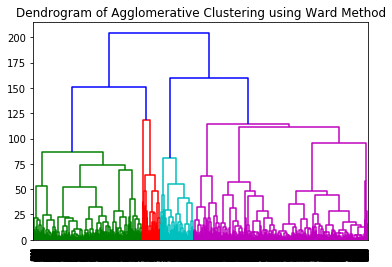

In [62]:
#create the dendrogram for agglomerative clustering with ward method
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram of Agglomerative Clustering using Ward Method')


In [75]:
#initialize agglomerative model
agglomerative = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
agglomerative.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

## Dataset with Clusters Assigned

In [76]:
#recreate dataset with feature to show which cluster it belongs to
clusters_agg=pd.concat([df, pd.DataFrame({'cluster':agglomerative.labels_})], axis=1)
clusters_agg.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [77]:
#create dataset with PCA components and agglomerative cluster
df_pca_agglomerative = pd.concat([df_pca, pd.DataFrame({'cluster':agglomerative.labels_})], axis = 1)
df_pca_agglomerative.head()

,principal component 1,principal component 2,cluster
0,-1.682220,-1.076445,1
1,-1.138298,2.506485,2
2,0.969682,-0.383533,3
3,-0.873629,0.043174,1
4,-1.599433,-0.688577,1


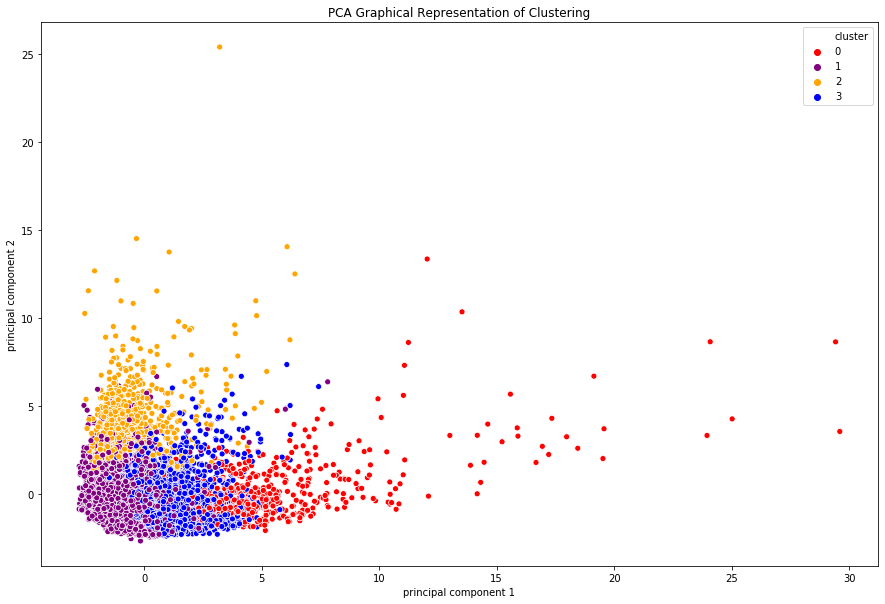

In [78]:
#graph PCA graph of agglomerative clustering
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=df_pca_agglomerative,palette=['red','purple','orange','blue'])
plt.title('PCA Graphical Representation of Clustering')
plt.show()

## Distribution of Features by Clusters

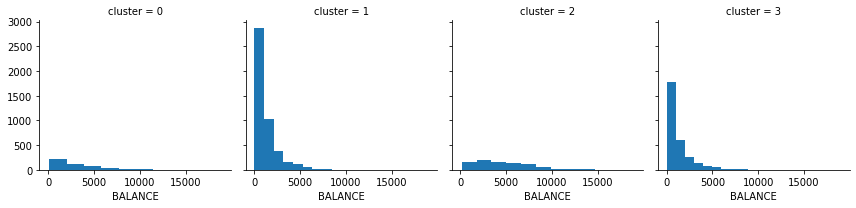

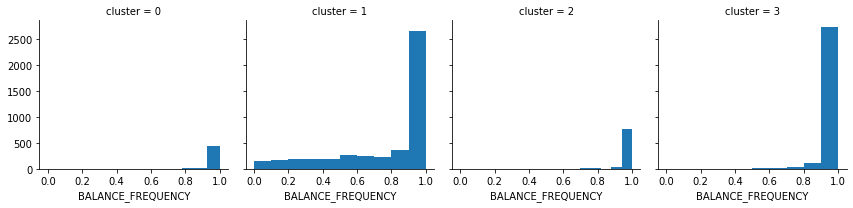

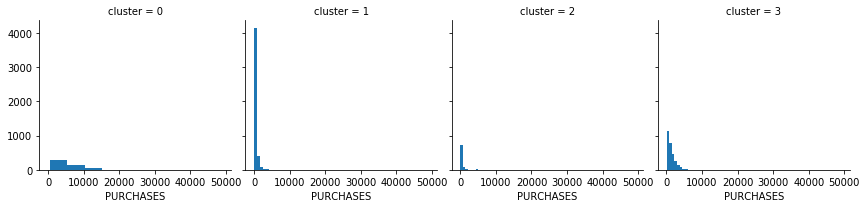

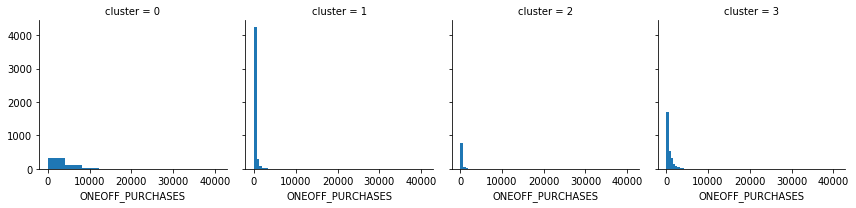

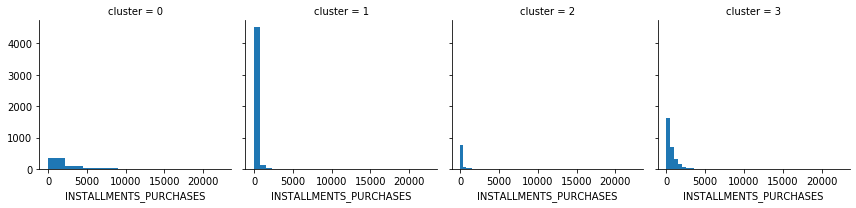

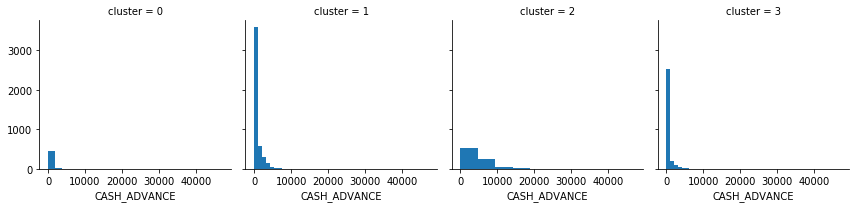

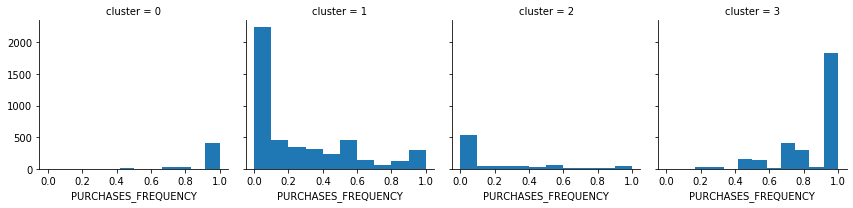

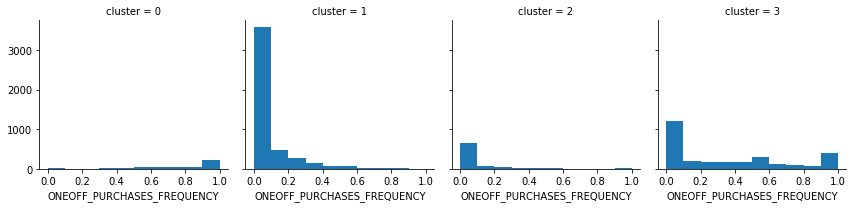

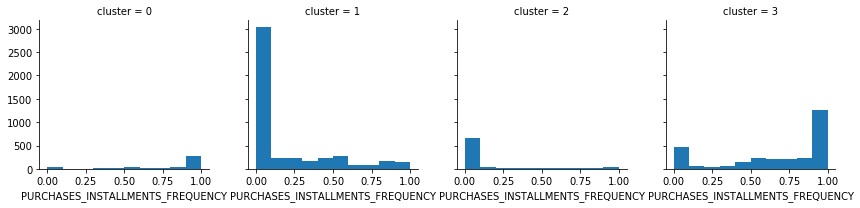

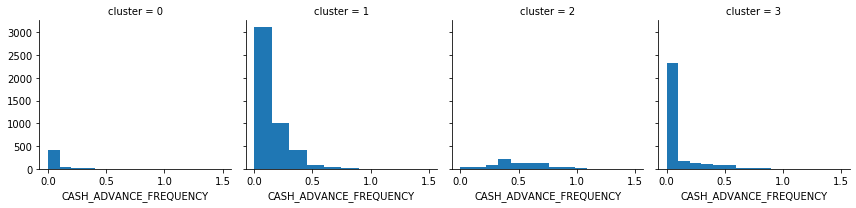

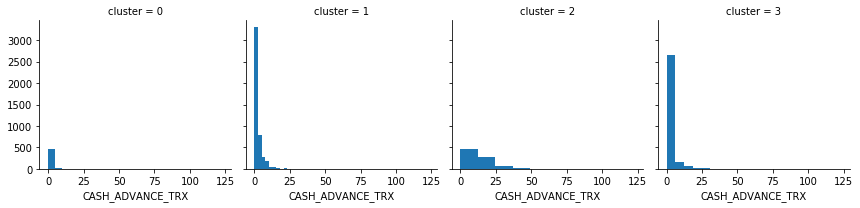

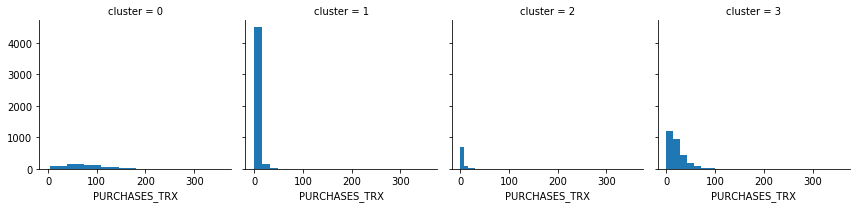

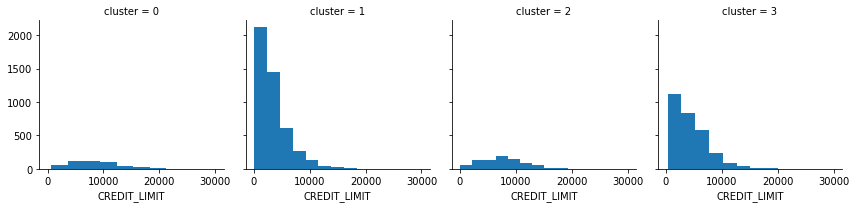

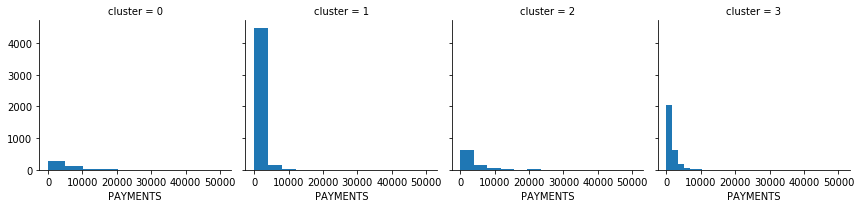

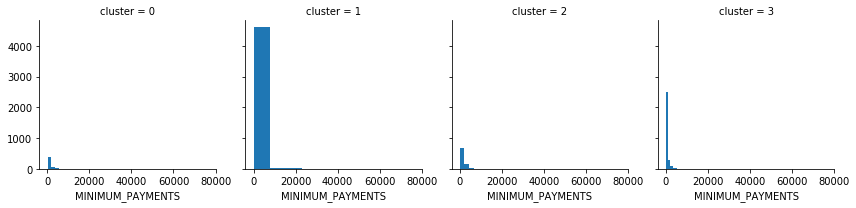

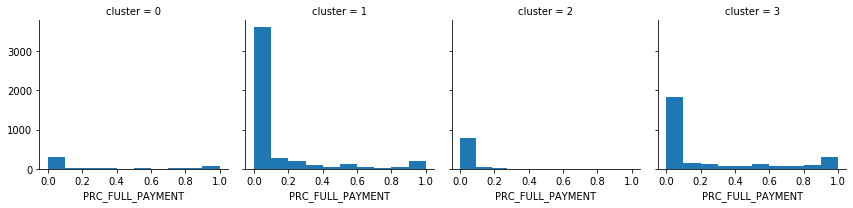

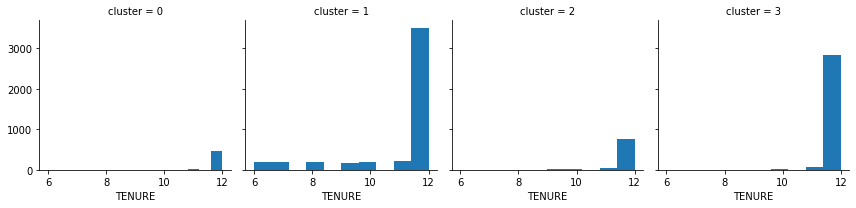

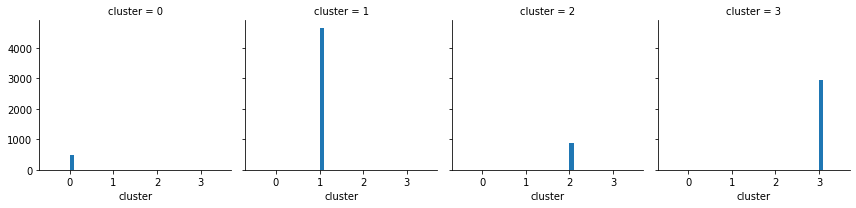

In [90]:
#show comparison of histogram for each feature of clusters
clusters_agg.groupby('cluster').mean()
for c in clusters:
    grid= sns.FacetGrid(clusters_agg, col='cluster')
    grid.map(plt.hist, c)

## Means of Each Feature by Cluster

In [95]:
#show the mean of each feature for each cluster
round(clusters_agg.groupby('cluster').mean(),2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3261.59,0.99,6703.43,4494.81,2209.86,428.81,0.94,0.75,0.77,0.05,1.16,80.31,9125.77,6224.08,1486.11,0.27,11.95
1,1082.62,0.78,317.09,190.80,126.61,689.24,0.26,0.08,0.18,0.11,2.15,4.31,3448.35,1031.31,797.63,0.11,11.14
2,4733.39,0.98,389.40,264.28,125.24,4742.44,0.20,0.10,0.12,0.50,15.15,4.72,7716.72,3674.26,1658.39,0.03,11.79
3,1115.78,0.98,1329.75,680.44,649.48,422.11,0.87,0.34,0.67,0.08,1.84,23.31,4441.12,1532.52,632.80,0.24,11.96


| Cluster | Balance | Credit Limit | Cash Advance | Purchase Amount | Installment Purchases Frequency | One-off Purchases Frequency |
|---------|---------|--------------|--------------|-----------------|---------------------------------|-----------------------------|
| 0       | High    | High         | Low          | High            | High                            | High                        |
| 1       | Low     | Low        | Low          | Low             | Low                             | Low                         |
| 2       | High    | High         | High         | Low             | Low                             | Low                         |
| 3       | Low     | Medium       | Low          | Medium          | High                            | Medium                      |

Cluster 0: Big Spenders. Have high credit limits and high balance. Frequently purchase things in one-off or installments.

Cluster 1: Thrifty Spenders. small balance, small credit limit, rarely buy things

Cluster 2: Short on Cash. Have a high balance and high credit limit. Does not make many purchases but takes cash advances often.

Cluster 3: Sensible Spender. Have a low balance and medium credit limit. Mostly buys things in installments.

In [162]:
#perform silhouette score method to determine best parameters for gmm clustering
silhouette_gmm = []

for cluster in range(2,18,1):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type).fit_predict(x)
        sil_score = metrics.silhouette_score(x, gmm, metric='euclidean')
        silhouette_gmm.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )


In [163]:
#create a list of silhouette scores with varying parameters and create a table in descending order by silhouette score
silhouette_gmm = pd.DataFrame(silhouette_gmm, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])
silhouette_gmm.sort_values('sil_score', ascending=False)

,cluster,sil_score,covariance_type,number_of_clusters
1,2,0.253182,tied,2
3,2,0.224244,spherical,2
41,12,0.214012,tied,12
37,11,0.212629,tied,11
33,10,0.208791,tied,10
...,...,...,...,...
62,17,-0.010283,diag,17
50,14,-0.011120,diag,14
60,17,-0.011388,full,17
38,11,-0.022107,diag,11


In [167]:
#initialize gmm model with highest silhouette score
gmm = GaussianMixture(n_components = 12 ,covariance_type = 'tied').fit_predict(x)

In [168]:
#create table of PCA components and assigned cluster
df_pca_gmm = pd.concat([df_pca, pd.DataFrame({'cluster':gmm})], axis = 1)
df_pca_gmm.head()

,principal component 1,principal component 2,cluster
0,-1.682220,-1.076445,4
1,-1.138298,2.506485,5
2,0.969682,-0.383533,8
3,-0.873629,0.043174,4
4,-1.599433,-0.688577,4


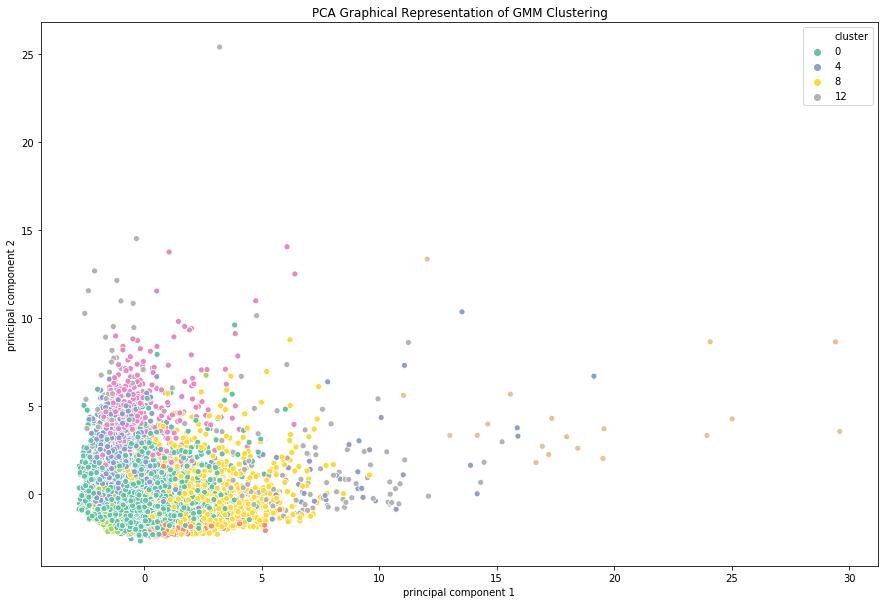

In [169]:
#graphh PCA graph of gmm clustering
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=df_pca_gmm, palette='Set2')
plt.title('PCA Graphical Representation of GMM Clustering')
plt.show()

# Other Clustering Methods

### DB Scan 
* data points are too densely packed 
* Only able to achieve 1 very dense cluster and some noise 
* DB scan is not well-suited for this data set

### GMM Clustering
* After performing the silhouette score method for optimal GMM model parameters, the clustering was very poor.
* GMM clustering is not well-suited for this data set

# Model of Choice


## Kmeans Clustering
* Same grouping as agglomerative clustering but has less overlap in clusters visually


# What can we do with this segmentation?

* Create targeted credit cards to appeal to each user type
    * Cash advance cards
    * Spending rewards cards
    * Free balance transfer


# Where can we go from here?

* Find more data on what customers are spending money on and further segment the data for more targeted promotions and advertisements